# Реализация явной схемы для начально-краевой задачи для уравнения теплопроводности на отрезке.

In [520]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [521]:
#CONSTANTS
N = 1.0 # Предел по х
M = 10.0 # Предел по t
h = 0.05 # Шаг по х
tau = 0.001 # Шаг по t


def mass(N, M, h, tau):  
    Y = np.zeros(((int(M/tau)+2), int(N/h)+2))
    return Y


def initial(N, M, h, tau):
    Y = mass(N, M, h, tau)
    
    N = int((N+h)*100)
    h = int(h*100)
    M = int((M+tau)*1000)
    tau = int(tau*1000)
    
    # Заполнение массива дискретным набором x и t
    Y[0, 1:] = [i/100 for i in range(0, N, h)]
    Y[1:, 0] = [i/1000 for i in range(0, M, tau)]

    # Заполлнение массива НУ и ГУ по x и t
    Y[1:, 1] = 1
    Y[1:, -1] = [2*math.cos(i) for i in Y[1:,0]]
    Y[1, 1:] = [math.pow(2, i) for i in Y[0, 1:]]
    return Y
#end_def
#
# *****************************************************************************


def calc():    
    Y = initial(N, M, h, tau)
    
    # Заполнение массива согласно алгоритму, по временным слоям
    for j in range(1, int(M/tau)):
        for i in range(2, int((N/h))):
            Y[j+1][i] = Y[j][i]+tau/(h**2)*(Y[j][i+1]-2*Y[j][i]+Y[j][i-1])+tau*(-Y[0][i]**2+Y[0][i])*math.sin(Y[j][0])
    return Y
#end_def
#
# *****************************************************************************     

Y = calc()
print(Y)

[[ 0.00e+00  0.00e+00  5.00e-02 ...  9.00e-01  9.50e-01  1.00e+00]
 [ 0.00e+00  1.00e+00  1.04e+00 ...  1.87e+00  1.93e+00  2.00e+00]
 [ 1.00e-03  1.00e+00  1.04e+00 ...  1.87e+00  0.00e+00  2.00e+00]
 ...
 [ 1.00e+01  1.00e+00  9.46e-01 ...  5.06e-02  0.00e+00 -1.68e+00]
 [ 1.00e+01  1.00e+00  9.46e-01 ...  5.06e-02  0.00e+00 -1.68e+00]
 [ 1.00e+01  1.00e+00  0.00e+00 ...  0.00e+00  0.00e+00 -1.68e+00]]


<function matplotlib.pyplot.show(close=None, block=None)>

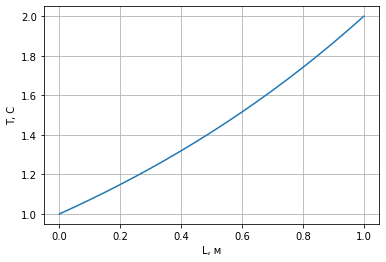

In [522]:
'''
Визуализация решения в плоскости XOU в момент времени t = 0
'''

visual = []
# Из матрицы Y вытаскиваем координаты (x, t, T) 
for j in range(1,len((Y[0]))):
    for i in range(1,len((Y[:, 0]))):
        visual.append([Y[0][j],Y[i][0],Y[i][j]])
    #end_for_i
#end_for_j

x,y,z = [],[],[]

# Заполняем листы с координатами x, y, z (x, t, T)
for elem in visual:
    if elem[1] == 0:
        x.append(elem[0])
        y.append(elem[1])
        z.append(elem[2])
    #end_if
#end_for

'''
#create 3d axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
'''

plt.plot(x,z)
plt.grid()
plt.xlabel('L, м')
plt.ylabel('T, C')
plt.show

Условие устойчивости явной схемы: tau <= h*h/2

In [523]:
tau <= h*h/2

True